In [1]:
# load packages
require(dplyr)
require(ggplot2)
require(xlsx)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Loading required package: xlsx
Loading required package: rJava
Loading required package: xlsxjars


In [2]:
# load data
gerganas.data <- read.xlsx('exp_029_data_6dEB_quantified_FINISHED.xlsx', sheetIndex = 1) %>% 
                    mutate(Day = as.factor(Day))

In [3]:
# look only at standards (not unknowns)

standards <- gerganas.data %>% filter(!is.na(known_6dEB))
standards

,Flag,Name,Data.File,Type,Acq..Date.Time,RT,FWHM,Height,S.N,Symmetry,Area,Width,Day,is_standard,known_6dEB
1,NA,30_mgL,30_mgL.d,Sample,2016-05-26 14:35:00,2.737,0.035,3480588,27.97,3.43,8832080,0.149,0,1,30
2,NA,10_mgL,10_mgL.d,Sample,2016-05-26 17:03:00,2.78,0.037,1388977,10.92,2.04,3901770,0.158,0,1,10
3,NA,3_mgL,3_mgL.d,Sample,2016-05-26 19:41:59,2.774,0.036,835798,5.04,3.46,2102388,0.15,0,1,3
4,NA,2_mgL,2_mgL.d,Sample,2016-05-26 17:42:59,2.775,0.031,336402,3.48,0.89,549717,0.066,0,1,2
5,NA,1_mgL,1_mgL.d,Sample,2016-05-26 18:22:00,2.813,0.737,195339,1.15,0.02,520861,0.119,0,1,1
6,NA,0.5_mgL,0.5_mgL.d,Sample,2016-05-26 17:19:59,2.793,0.029,126828,1.16,0.66,229654,0.105,0,1,0.5
7,NA,rp_std,test4.d,Sample,2016-05-26 13:08:00,2.802,0.009,333362,3.74,1.92,183540,0.041,0,1,0
8,!,rp_std,rp_std04.d,Sample,2016-05-26 19:14:00,2.366,0.007,330233,3.96,1.02,132299,0.019,0,1,0
9,NA,0.2_mgL,0.2_mgL.d,Sample,2016-05-26 20:26:59,2.806,0.032,212518,2.22,0.14,112742,0.046,0,1,0.2
10,NA,rp_std,rp_std01.d,Sample,2016-05-26 14:39:59,2.871,0.007,330934,2.64,0.76,83038,0.029,0,1,0


In [4]:
calibration <- standards %>% lm(., formula = known_6dEB ~ Area:Day - 1)

calibration %>% summary


Call:
lm(formula = known_6dEB ~ Area:Day - 1, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6609 -1.2608 -0.2561 -0.0500  4.2472 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
Area:Day0 3.173e-06  2.137e-07   14.84 2.92e-12 ***
Area:Day1 4.880e-06  3.358e-07   14.53 4.32e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.12 on 20 degrees of freedom
Multiple R-squared:  0.9557,	Adjusted R-squared:  0.9513 
F-statistic: 215.7 on 2 and 20 DF,  p-value: 2.911e-14


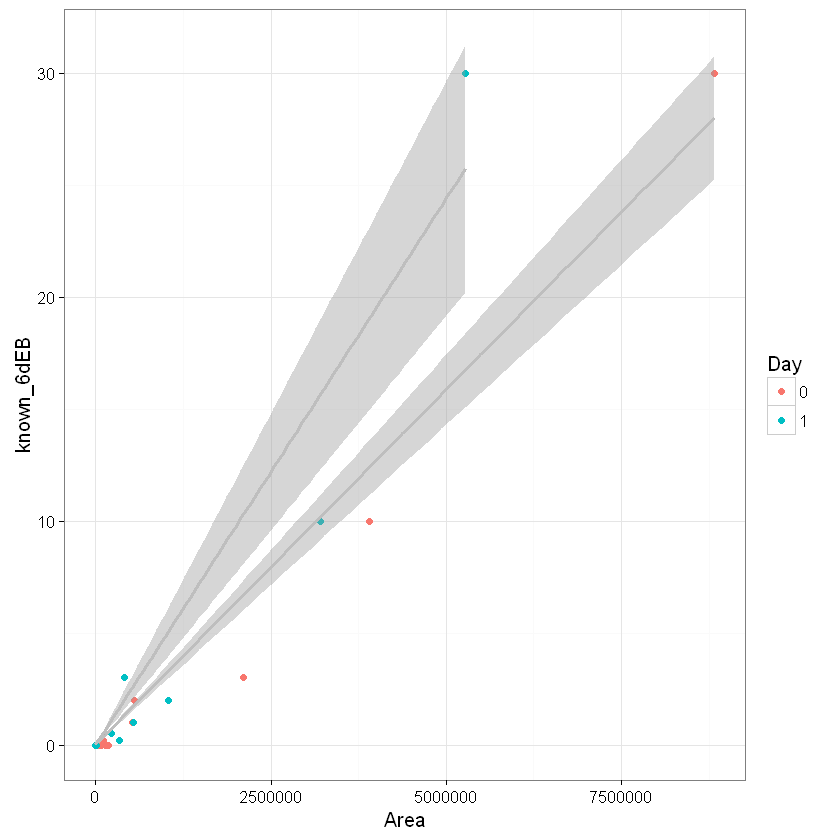

In [5]:
calib.plot <- standards %>% ggplot(aes(x = Area, y = known_6dEB, color = Day, group = Day)) +
                                geom_point() +
                                theme_bw() +
                                stat_smooth(method = 'lm', formula = y ~ x - 1, se = T, color = 'gray')

calib.plot

In [6]:
gerganas.data %<>% mutate(fitted.6dEB = predict(calibration, newdata = gerganas.data, se.fit = T)$fit) %>%
                   mutate(fitted.6dEB.se = predict(calibration, newdata = gerganas.data, se.fit = T)$se)

In [7]:
## CODE TO GENERATE THE EXCEL FILE I ALREADY SENT TO GERGANA
## COMMENTED OUT TO AVOID OVERWRITING THE FILE
# write.xlsx(gerganas.data, file = 'gerganas_data_fitted.xlsx', sheetName = 'calibrate_data')

# options(repr.plot.width = 4, repr.plot.height = 3)

# calib.plot <- standards %>% ggplot(aes(x = Area, y = known_6dEB)) +
#                                 geom_point() +
#                                 theme_bw() +
#                                 stat_smooth(method = 'lm', formula = y ~ x - 1, se = T, color = 'gray')

# calib.plot + xlab('Peak Area') + ylab('Nominal 6dEB (mg/L)\n from serial dilution of std.')

# ggsave('6dEB_standard_curve_try1.pdf', height = 3, width = 4)

In [8]:
day.1.calib <- standards %>% filter(Day == 1) %>% lm(., formula = known_6dEB ~ Area - 1)
day.1.calib %>% summary


Call:
lm(formula = known_6dEB ~ Area - 1, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6609 -1.6458 -0.5758 -0.0050  4.2472 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
Area 4.880e-06  4.536e-07   10.76  4.9e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.863 on 8 degrees of freedom
Multiple R-squared:  0.9354,	Adjusted R-squared:  0.9273 
F-statistic: 115.7 on 1 and 8 DF,  p-value: 4.905e-06


In [9]:
day.0.calib <- standards %>% filter(Day == 0) %>% lm(., formula = known_6dEB ~ Area - 1)
day.0.calib %>% summary


Call:
lm(formula = known_6dEB ~ Area - 1, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6700 -0.5823 -0.2488 -0.1378  1.9793 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
Area 3.173e-06  1.435e-07   22.11 4.31e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.423 on 12 degrees of freedom
Multiple R-squared:  0.976,	Adjusted R-squared:  0.9741 
F-statistic:   489 on 1 and 12 DF,  p-value: 4.305e-11
